# Initialization

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import scqubits as qubit
import scqubits.utils.plotting as plot

import numpy as np

# 0-pi qubit, decoupled from zeta mode

In [2]:
# parameters for the 0-\pi circuit

phi_grid = qubit.Grid1d(-6*np.pi, 6*np.pi, 200)

EJ_CONST = 1/3.95  # note that EJ and ECJ are interrelated

zeropi = qubit.ZeroPi(
    grid = phi_grid,
    EJ   = EJ_CONST,
    EL   = 10.0**(-2),
    ECJ  = 1/(8.0*EJ_CONST),
    EC = None,
    ECS  = 10.0**(-3),
    dEJ = 0.03,
    dCJ = 0.04,
    ng   = 0.1,
    flux = 0.23,
    ncut = 30
)

In [3]:
N = 4    # arbitrary last index of the particular eigenstate to be used for comparison, i.e., use 0, 1, ..., N-1
M = 7   # number of evals to be compared

In [4]:
TESTNAME = 'zeropi_1.hdf5'

zeropi.eigenvals(evals_count=M, filename='./data/' + TESTNAME)

array([0.45879572, 0.48945896, 0.50132873, 0.51864989, 0.53047135,
       0.54609029, 0.55758126])

In [5]:
TESTNAME = 'zeropi_2.hdf5'

evals, evecs = zeropi.eigensys(evals_count=N,  filename='./data/' + TESTNAME)

Spectral data:   0%|          | 0/15 [00:00<?, ?it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

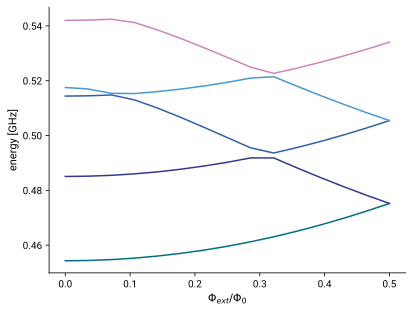

In [6]:
TESTNAME = 'zeropi_3'

flux_list = np.linspace(0, 0.5, 15)
zeropi.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=False)

In [7]:
TESTNAME = 'zeropi_4.hdf5'

flux_list = np.linspace(0.0, 0.5, 3)
tst = zeropi.get_spectrum_vs_paramvals('flux', flux_list, evals_count=3, subtract_ground=False, get_eigenstates=True, filename='./data/' + TESTNAME)

Spectral data:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
TESTNAME = 'zeropi_5.hdf5'

nmat = zeropi.matrixelement_table('n_theta_operator', evecs=None, evals_count=10, filename='./data/' + TESTNAME)